## Projeto de Disciplina - Algoritmos de Inteligência Artificial para clusterização [25E4_2]
### Aluna: Rosana Ribeiro Lima

O código e demais artefatos deste projeto se encontram disponibilizados em https://github.com/roriblim/PD-algoritmos-clusterizacao

### Parte 1

O projeto foi desenvolvido dentro de um ambiente virtual Python 3.12, criado por meio do Anaconda versão 25.5.1. As bibliotecas e dependências encontram-se no requirements.txt, que foi criado a partir do requirements.in. Mais detalhes sobre a configuração feita e sobre como o ambiente foi montado encontram-se no README do projeto Github mencionado acima.

- Captura de tela do ambiente rodando na minha máquina:

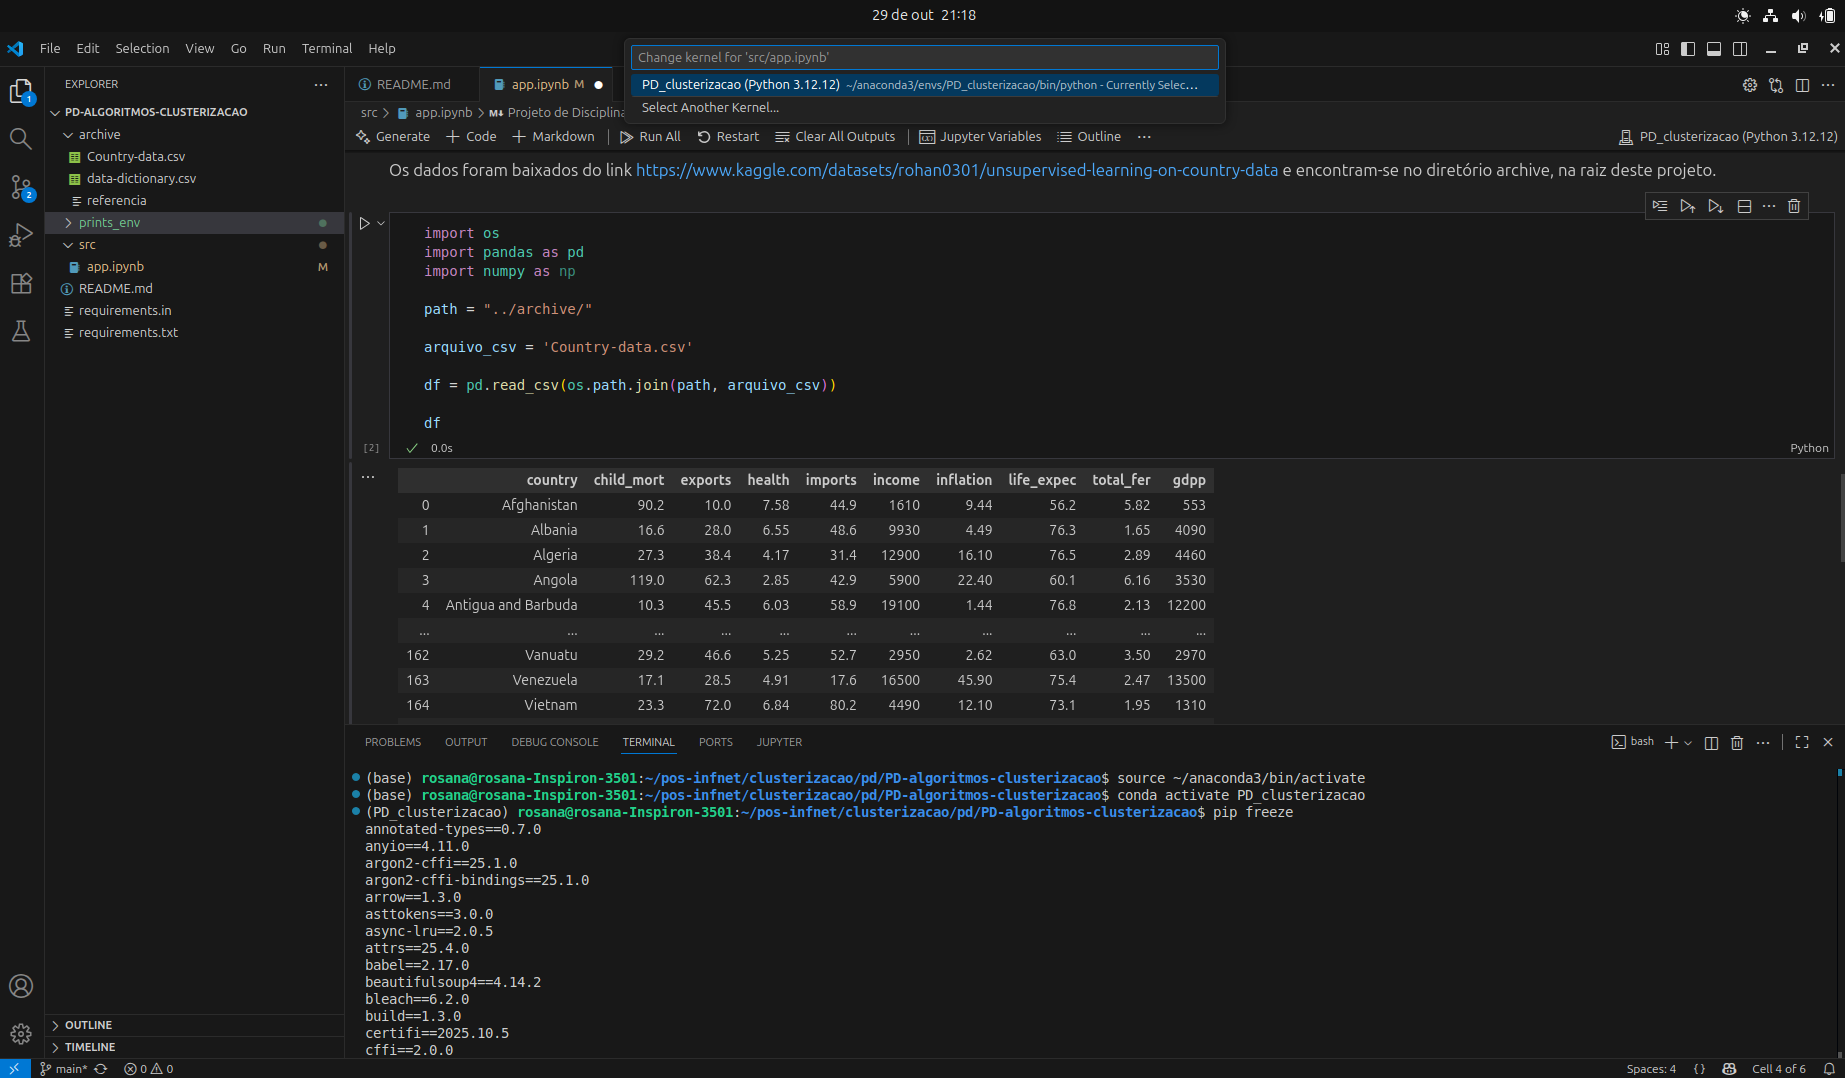

### Parte 2
#### 2.1.
Os dados foram baixados do link https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data e encontram-se no diretório archive, na raiz deste projeto.

In [89]:
import os
import pandas as pd
import numpy as np

path = "../archive/"

arquivo_csv = 'Country-data.csv'

df = pd.read_csv(os.path.join(path, arquivo_csv))

df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#### 2.2. 

A fim de avaliar quantos países únicos existem no dataset, podemos fazer uma análise pela coluna "country", tanto por meio do value_counts() quanto por meio do nunique(). Após essa análise, é possível verificar que existem 167 países no dataset:

In [90]:

n_paises = df['country'].nunique()
print(df['country'].value_counts())
print(f"Número de países únicos: {n_paises}")


country
Afghanistan            1
Albania                1
Algeria                1
Angola                 1
Antigua and Barbuda    1
                      ..
Vanuatu                1
Venezuela              1
Vietnam                1
Yemen                  1
Zambia                 1
Name: count, Length: 167, dtype: int64
Número de países únicos: 167


#### 2.3. 

A fim de mostrar através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização e analisar, vamos optar por realizar dois tipos de gráficos:
- boxplot
- histograma

Antes disso, porém, é necessário identificar quais variáveis serão utilizadas clusterização. No caso, convém utilizar todas as variáveis numéricas.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Identificamos que apenas country é uma variável nominal, e por isso não será utilizada na clusterização.

In [92]:
training_cols = df.select_dtypes(include=["number"]).columns
print('colunas numéricas, a serem utilizadas na clusterização:', training_cols.tolist() )

colunas numéricas, a serem utilizadas na clusterização: ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


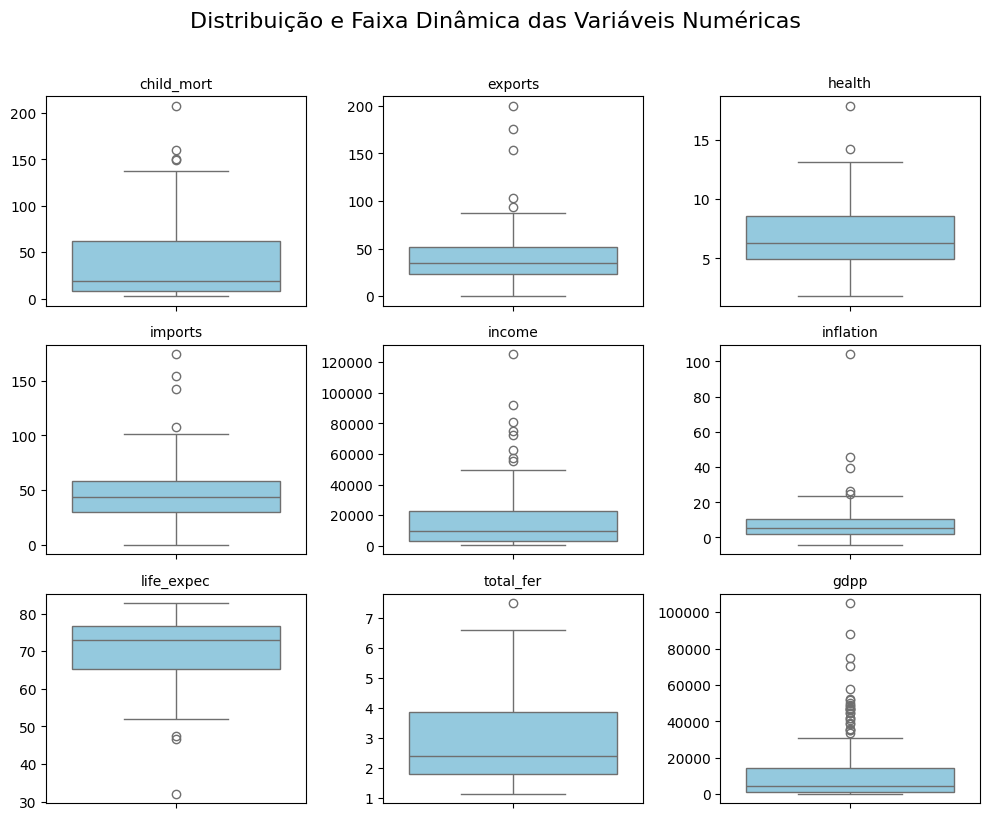

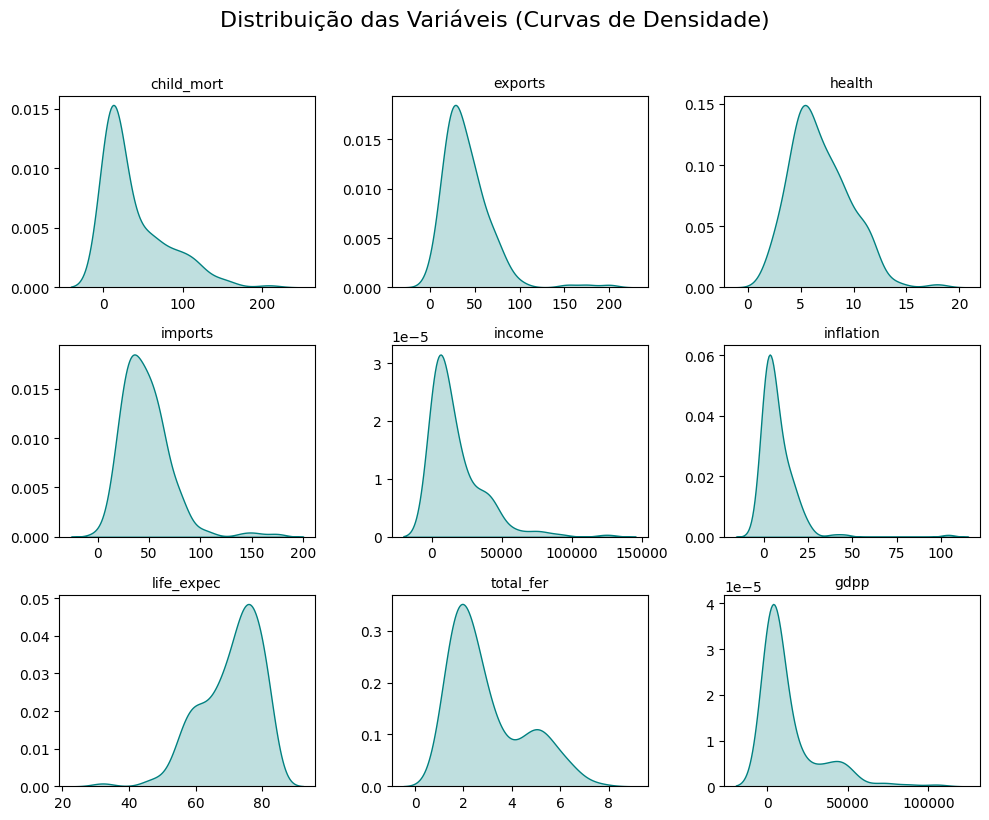

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- BOXPLOTS (verticais em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição e Faixa Dinâmica das Variáveis Numéricas", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(training_cols):
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

# --- HISTOGRAMAS CONTÍNUOS (curvas de densidade em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição das Variáveis (Curvas de Densidade)", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(training_cols):
    sns.kdeplot(df[col], fill=True, ax=axes[i], color="teal")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()


##### Análise

Dos resultados dos histogramas e do boxplot, é possível fazer algumas observações:
- as escalas das variáveis são muito diferentes. Por exemplo, se compararmos o boxplot de income e de total_fer, veremos que as escalas são muito distintas (o primeiro tem valores muito mais elevados que o segundo). Isso pode interferir na clusterização ao usar algoritmos baseados em distância. Será necessário algum tipo de escalonamento para lidar com essa diferença;
- grande presença de outliers, que pode ser observado também nos boxplots, principalmente nos de gdpp, income e inflação. Isso mostra que será necessário adotar alguma estratégia para lidar com os outliers;
- pelos histogramas, é possível ver que, em geral, os dados seguem uma distribuição semelhante à distribuição normal. Assim, os principais ajustes necessários serão os já mencionados ajustes de outliers e de escala.

Uma opção então, que pode resolver o escalonamento e também lidar bem com os outliers é o RobustScaler. Isso porque o RobustScaler consegue lidar bem com outliers ao levar em consideração a mediana em vez da média e o intervalo interquartil em vez do desvio-padrão. Mas para confirmar essa opção, vamos fazer mais uma análise nos dados, que é a análise dos quartis e da mediana na distribuição de cada variável:

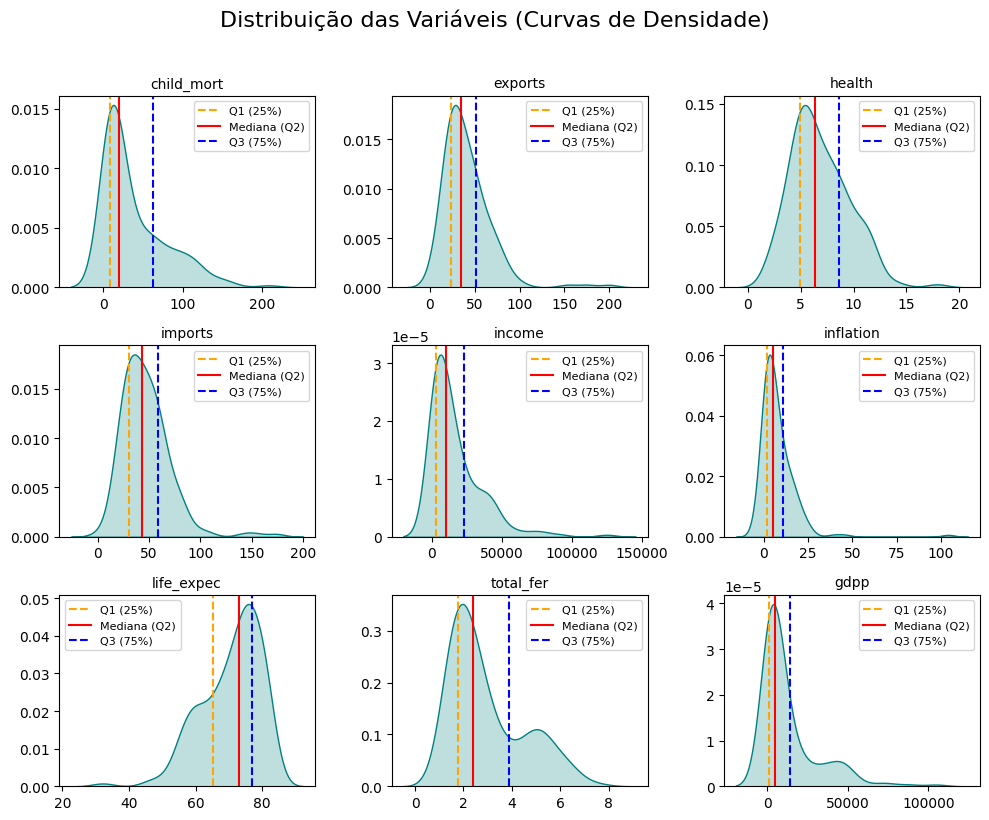

In [94]:
# --- HISTOGRAMAS CONTÍNUOS (curvas de densidade em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição das Variáveis (Curvas de Densidade)", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(training_cols):
    sns.kdeplot(df[col], fill=True, ax=axes[i], color="teal")
    
    q1 = df[col].quantile(0.25)
    median = df[col].median()
    q3 = df[col].quantile(0.75)

    axes[i].axvline(q1, color="orange", linestyle="--", linewidth=1.5, label="Q1 (25%)")
    axes[i].axvline(median, color="red", linestyle="-", linewidth=1.5, label="Mediana (Q2)")
    axes[i].axvline(q3, color="blue", linestyle="--", linewidth=1.5, label="Q3 (75%)")
    
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
    axes[i].legend(fontsize=8)

plt.tight_layout()
plt.show()

Pelos gráficos agora da distribuição mostrando as medianas e os Q1 (primeiro quartil) e Q3 (terceiro quartil), é possível confirmar então que o RobustScaler será uma boa forma de lidar com as diferenças de escala e com os outliers. Isso ocorre porque o escalonamento com o Robust Scaler é feito com essas medidas: intervalo interquatil (IIQ, que é a diferença entre Q3 e Q1) e mediana, que por si só são medidas bastante robustas à presença de outliers.

Outra forma de lidar com outliers poderia ser a sua remoção, mas essa pode ser uma medida não muito boa aqui, pois os outliers podem conter informações importantes no nosso dataset, e não é desejável perdê-las. Além disso, mais um ponto a favor do Robust Scaler é que este é um escalonamento estatisticamente muito útil para lidar dados com distribuição no formato de caudas longas, que é o caso de muitas variáveis desse dataset (como health, child_mort, life_expec e total_fer).

Antes de realizar o escalonamento, é importante ainda fazer a análise e tratamento de dados nulos e eventualmente dados repetidos, o que será verificado no item a seguir.

#### 2.4.

O pré-processamento dos dados consistirá nas seguintes etapas:
- análise e tratamento de dados nulos
- análise e tratamento de dados repetidos
- análise de correlação a fim de verificar se existem colunas altamente correlacionadas (redundantes) em que alguma delas possa ser removida sem prejuízo de informação
- escalonamento robusto

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [96]:
df = df.dropna() 
df = df.drop_duplicates()
print("Após tratamento, informações do DataFrame:")
df.info()

Após tratamento, informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


É possível ver que os dados não contém dados duplicados nem dados nulos, pois após a remoção de duplicatas e nulos, manteve o mesmo tamanho original (167 linhas).

Segue-se então para a próxima etapa, que é a análise de eventuais colunas altamente correlacionadas. Para isso, inicia-se com uma breve análise de pairplot, a fim de verificar visualmente como as variáveis tendem se comportar, duas a duas.

Em seguida, será feita a análise de correlação. com auxílio da função corr().

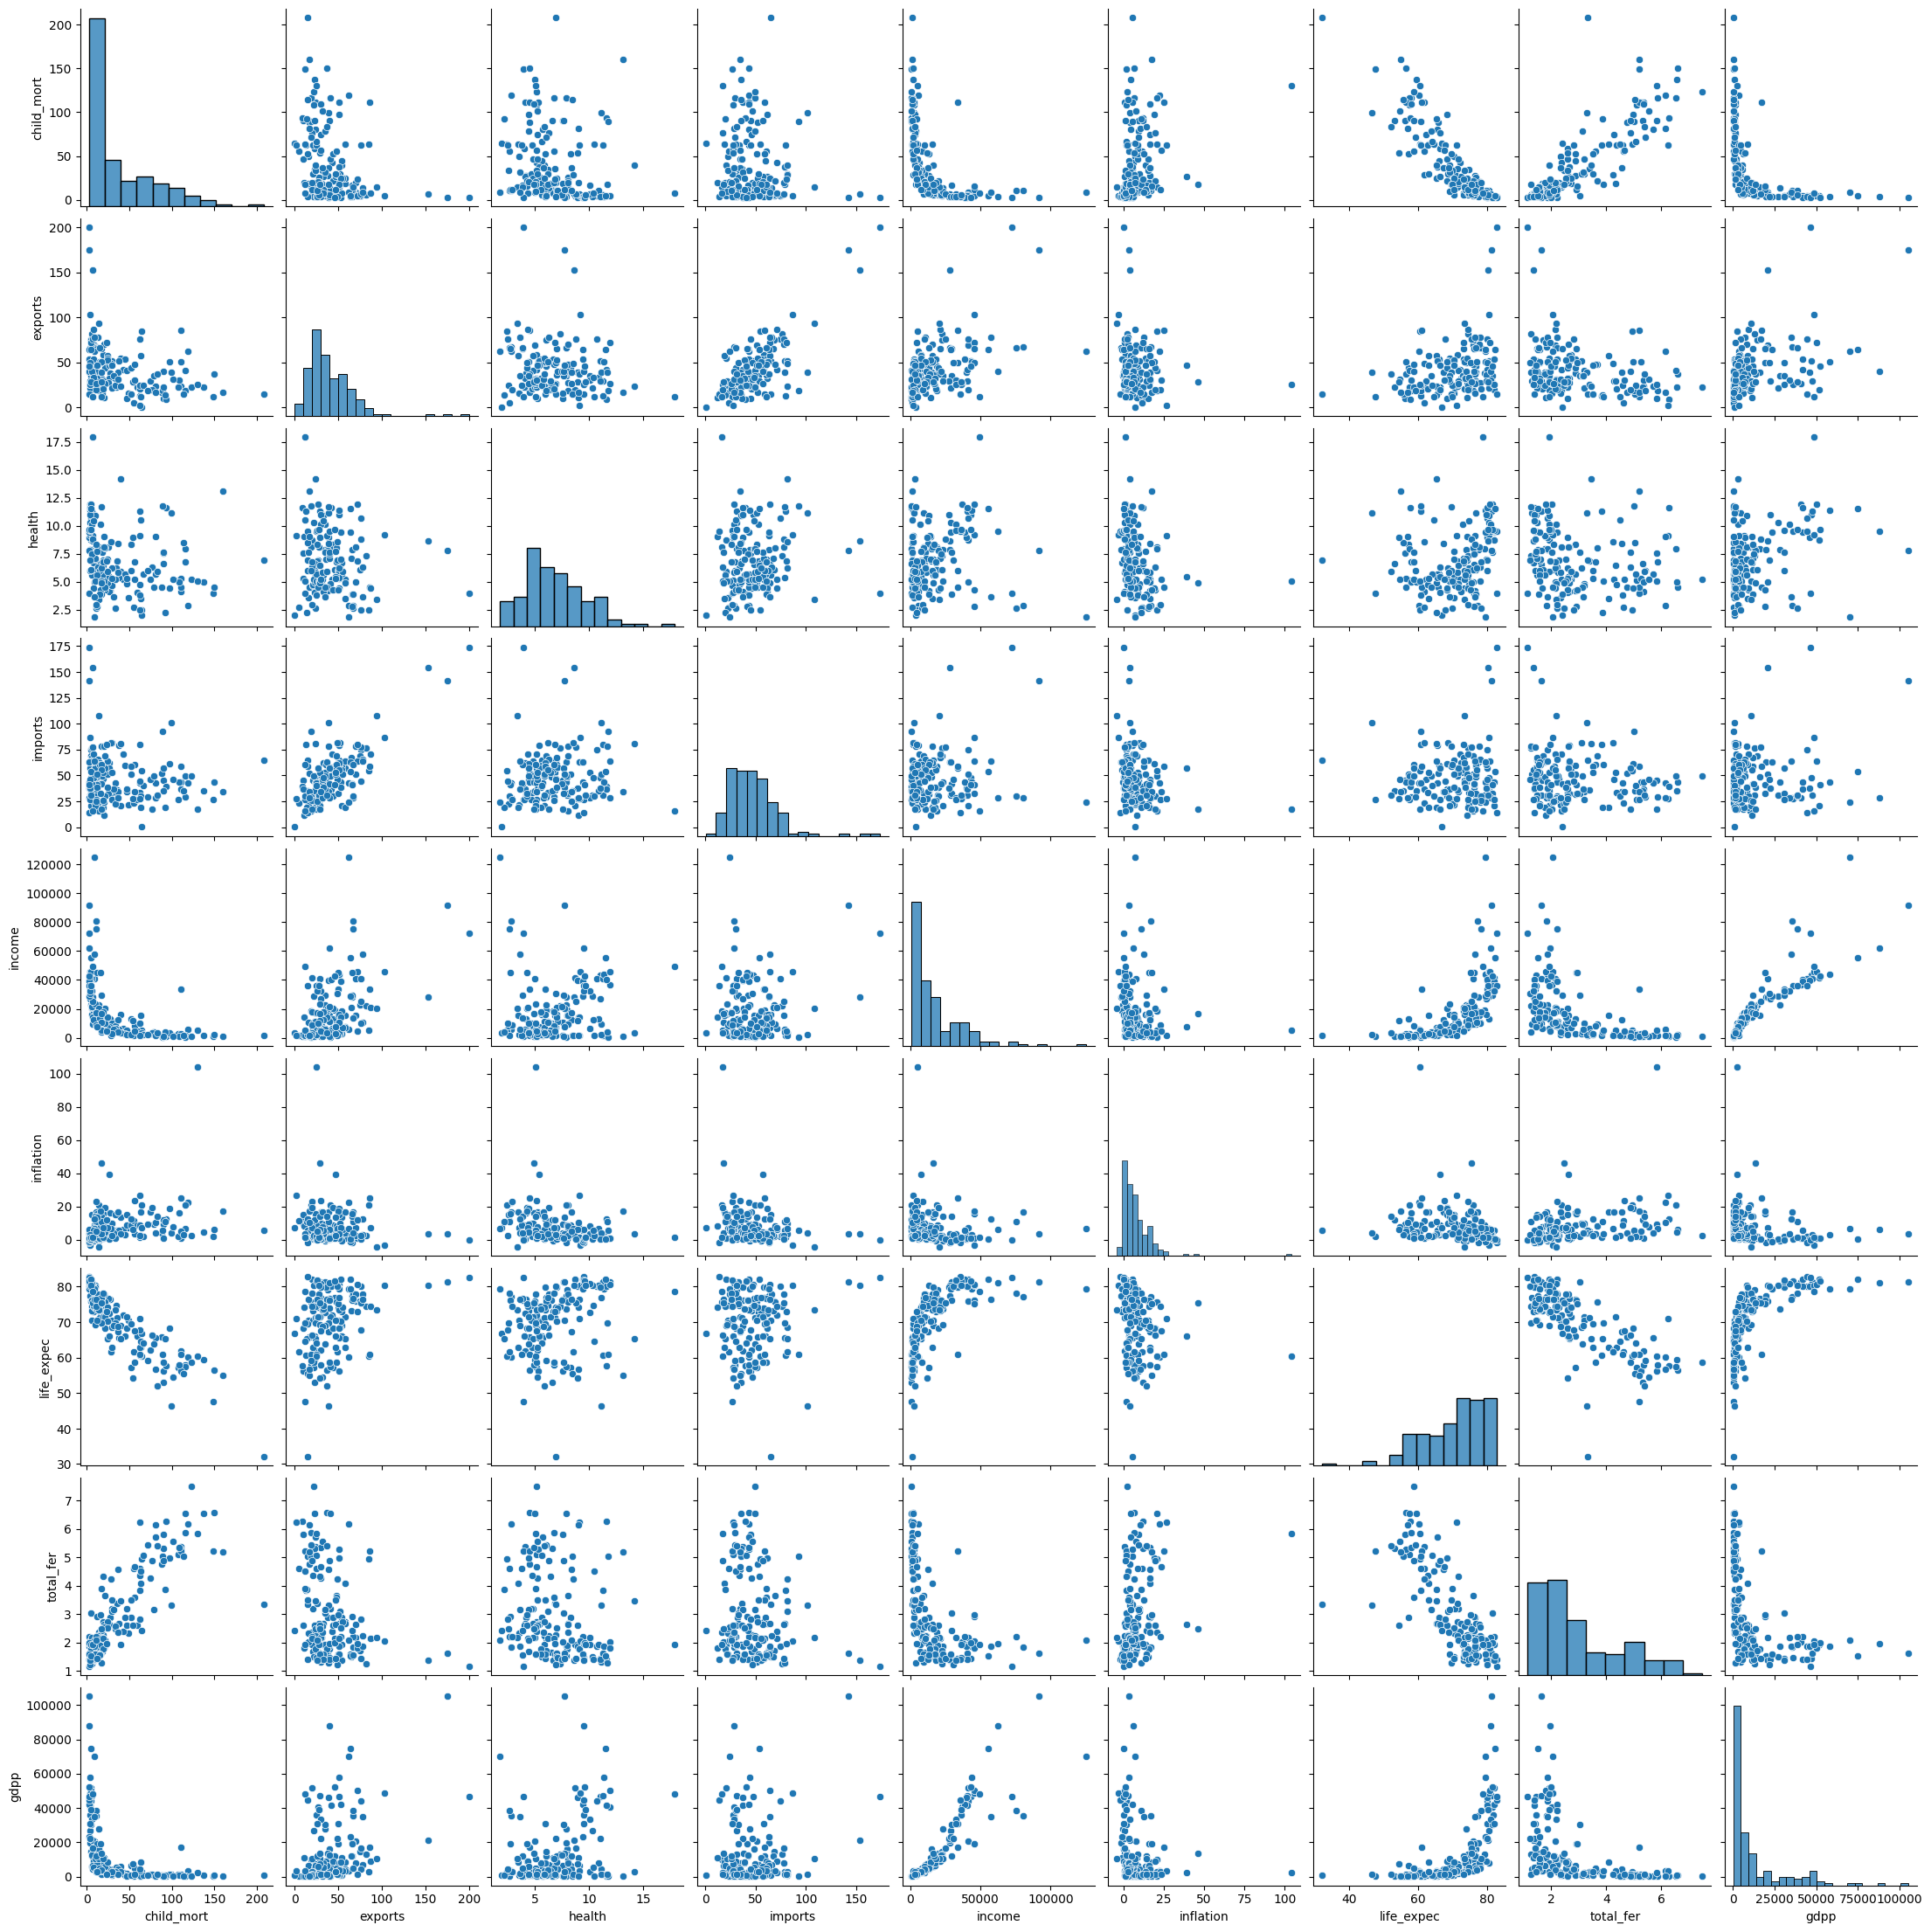

In [97]:
sns.pairplot(data=df[training_cols])
plt.show()

<Axes: >

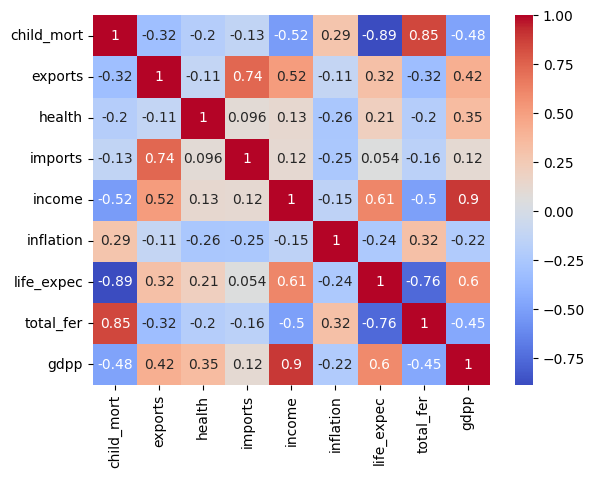

In [98]:
sns.heatmap(df[training_cols].corr(), annot=True, cmap='coolwarm')

É possível perceber que existem dois pares de variáveis altamente correlacionadas: 

- gdpp (gross domestic product per capita), ou PIB per capita e income (renda média ou mediana);
- life_expec (expectativa de vida) e child_mort (mortalidade infantil).

Faz sentido que esses dois pares mostrem variáveis que estão altamente correlacionadas. É necessário, a fim de saber se devem ser mantidas, analisar se uma eventual redundância de informações ao mantê-las é mais ou menos prejudicial do que a perca de eventuais informações ao remover alguma delas.

Analisando semanticamente, gdpp é uma métrica macroeconômica (produção nacional média), enquanto o income é uma métrica microeconômica (quanto as pessoas ganham). Elas tendem a se mover juntas, mas não necessariamente, especialmente para países com alta desigualdade, que podem ter um PIB per capita alto e um income mais baixo. Na maioria dos casos, elas se movem juntas, mas não sempre. Assim, para não perder essa informação, por ora ambos serão mantidos.

De forma semelhante, faz sentido que a expectativa de vida e a mortalidade infantil andem juntos (no caso, quanto maior a mortalidade infantil, menor deve ser a expectativa de vida). Porém, além da mortalidade infantil, outras podem ser as causas de uma expectativa de vida mais baixa, como a violência urbana, o estilo de vida, entre outros. Assim, a fim de não perder informação, também serão mantidas ambas.

A próxima etapa será então a aplicação do escalonador robusto:

In [99]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[training_cols] = scaler.fit_transform(df[training_cols])

df_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.316620,-0.907441,0.342391,0.056042,-0.429416,0.453020,-1.469565,1.635492,-0.322877
1,Albania,-0.050139,-0.254083,0.062500,0.185639,-0.001543,-0.100671,0.278261,-0.364508,-0.044811
2,Algeria,0.148561,0.123412,-0.584239,-0.416813,0.151196,1.197987,0.295652,0.230216,-0.015723
3,Angola,1.851439,0.990926,-0.942935,-0.014011,-0.208794,1.902685,-1.130435,1.798561,-0.088836
4,Antigua and Barbuda,-0.167131,0.381125,-0.078804,0.546410,0.470044,-0.441834,0.321739,-0.134293,0.592767


Por fim, verificando novamente a distribuição dos dados, dessa vez após o escalonamento:

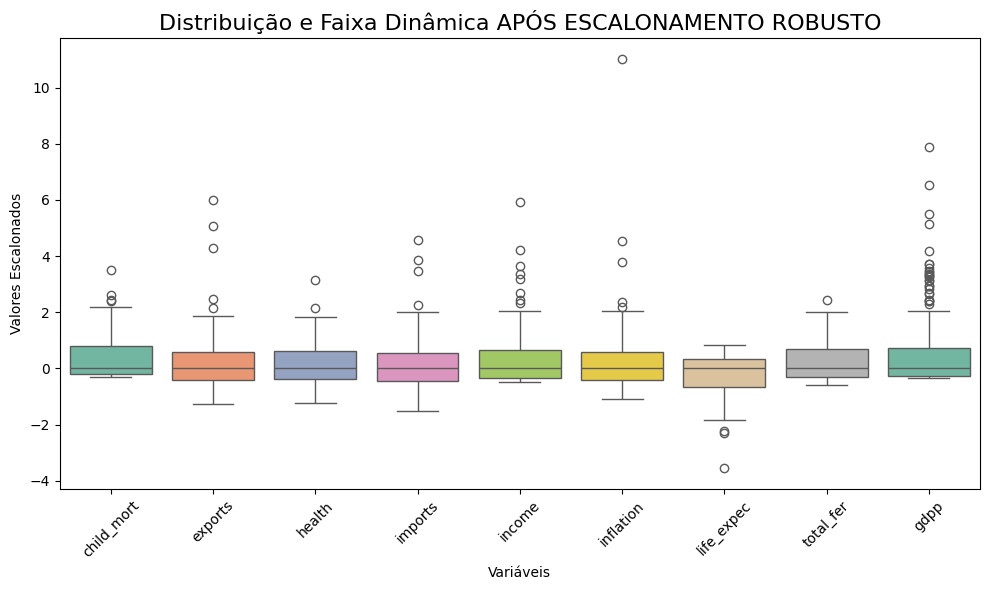

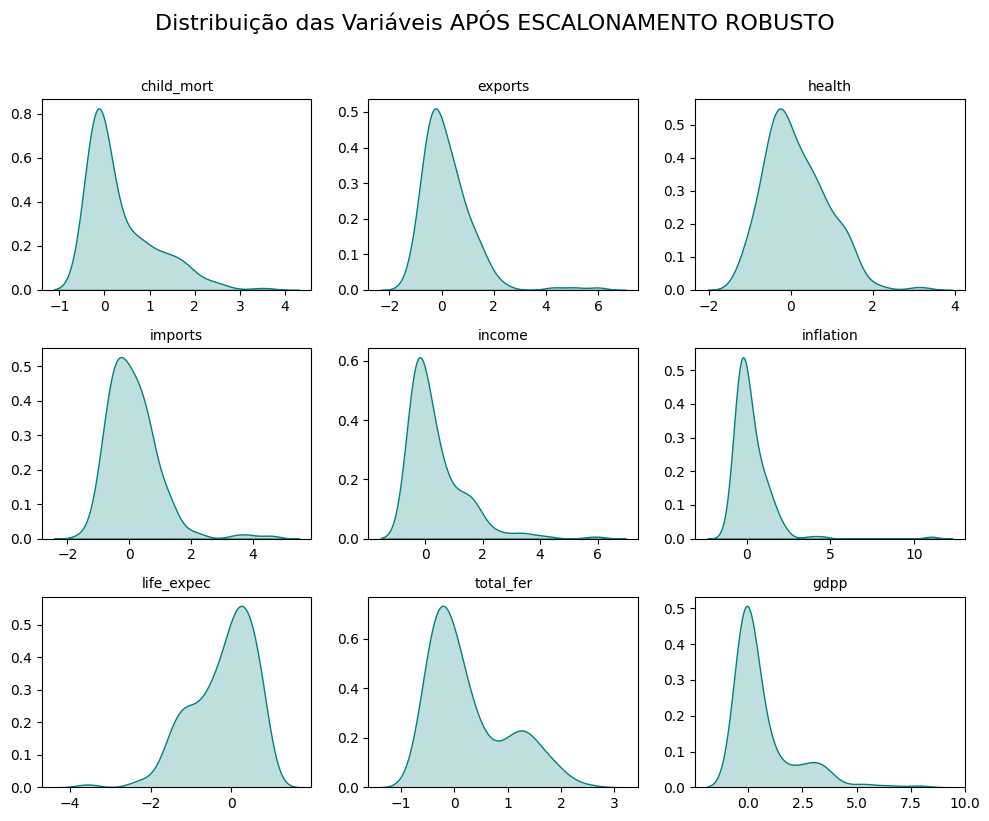

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scaled[training_cols], palette="Set2")

plt.title("Distribuição e Faixa Dinâmica APÓS ESCALONAMENTO ROBUSTO", fontsize=16)
plt.xlabel("Variáveis")
plt.ylabel("Valores Escalonados")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- HISTOGRAMAS CONTÍNUOS (curvas de densidade em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição das Variáveis APÓS ESCALONAMENTO ROBUSTO", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(training_cols):
    sns.kdeplot(df_scaled[col], fill=True, ax=axes[i], color="teal")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()


### Parte 3

#### 3.1.
##### a) Clusterização utilizando K-Means

In [101]:
training_data = df_scaled[training_cols]
training_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.316620,-0.907441,0.342391,0.056042,-0.429416,0.453020,-1.469565,1.635492,-0.322877
1,-0.050139,-0.254083,0.062500,0.185639,-0.001543,-0.100671,0.278261,-0.364508,-0.044811
2,0.148561,0.123412,-0.584239,-0.416813,0.151196,1.197987,0.295652,0.230216,-0.015723
3,1.851439,0.990926,-0.942935,-0.014011,-0.208794,1.902685,-1.130435,1.798561,-0.088836
4,-0.167131,0.381125,-0.078804,0.546410,0.470044,-0.441834,0.321739,-0.134293,0.592767
...,...,...,...,...,...,...,...,...,...
162,0.183844,0.421053,-0.290761,0.329247,-0.360504,-0.309843,-0.878261,0.522782,-0.132862
163,-0.040854,-0.235935,-0.383152,-0.900175,0.336333,4.531320,0.200000,0.028777,0.694969
164,0.074280,1.343013,0.141304,1.292469,-0.281306,0.750559,0.000000,-0.220624,-0.263365
165,0.687094,-0.181488,-0.309783,-0.311734,-0.281821,2.036913,-0.486957,1.083933,-0.263365


In [102]:
from sklearn.cluster import KMeans

df_kmeans = KMeans(n_clusters=3, random_state=101).fit(training_data)

df_scaled['cluster_kmeans'] = df_kmeans.labels_
df['cluster_kmeans'] = df_kmeans.labels_


##### b) Clusterização Hierárquica

In [103]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(training_data)

df_scaled['ward'] = ward.labels_
df['ward'] = ward.labels_

Após realizar tanto a clusterização com KMeans (ou K Médias) quanto a clusterização hierárquica, teremos os respectivos clusters representados pelas colunas cluster_kmeans e ward, respectivamente:

In [104]:
df_scaled.head(25)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,ward
0,Afghanistan,1.316620,-0.907441,0.342391,0.056042,-0.429416,0.453020,-1.469565,1.635492,-0.322877,1,1
1,Albania,-0.050139,-0.254083,0.062500,0.185639,-0.001543,-0.100671,0.278261,-0.364508,-0.044811,0,2
2,Algeria,0.148561,0.123412,-0.584239,-0.416813,0.151196,1.197987,0.295652,0.230216,-0.015723,0,2
3,Angola,1.851439,0.990926,-0.942935,-0.014011,-0.208794,1.902685,-1.130435,1.798561,-0.088836,1,2
4,Antigua and Barbuda,-0.167131,0.381125,-0.078804,0.546410,0.470044,-0.441834,0.321739,-0.134293,0.592767,0,2
5,Argentina,-0.089136,-0.584392,0.483696,-0.956217,0.449473,1.734899,0.234783,-0.019185,0.443396,0,2
6,Armenia,-0.022284,-0.515426,-0.521739,0.070053,-0.167652,0.266219,0.017391,-0.345324,-0.113208,0,2
7,Australia,-0.269266,-0.551724,0.654891,-0.784588,1.616868,-0.473154,0.773913,-0.230216,3.713836,2,0
8,Austria,-0.278552,0.591652,1.271739,0.157618,1.709437,-0.505257,0.643478,-0.465228,3.320755,2,0
9,Azerbaijan,0.369545,0.700544,-0.119565,-0.791594,0.310620,0.940716,-0.347826,-0.235012,0.092767,0,2


#### 3.2. Análise dos resultados do K-Médias

Vamos fazer uma análise para compreender as principais características da separação usando K-Médias. Para isso, vamos calcular as médias das variáveis dos dados de cada cluster e compará-las. 

Antes disso, porém, foi feita a separação dos dados de cada cluster, a fim de aplicar a função describe() nesses dados e ter um rápido olhar sobre as características de cada cluster:

In [105]:
df_kmeans_cluster0 = df[df['cluster_kmeans'] == 0]
df_kmeans_cluster1 = df[df['cluster_kmeans'] == 1]
df_kmeans_cluster2 = df[df['cluster_kmeans'] == 2]

In [106]:
print("KMeans - Cluster 0:")
df_kmeans_cluster0[training_cols].describe()



KMeans - Cluster 0:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,19.374419,42.830233,6.503953,49.079070,14131.279070,6.084884,73.387209,2.232093,7932.953488
std,12.654441,18.714795,2.218256,19.221404,9225.827276,5.643355,4.281638,0.722638,6334.600660
min,3.200000,10.700000,2.500000,11.800000,1780.000000,-4.210000,58.600000,1.230000,758.000000
25%,10.300000,27.925000,5.070000,33.550000,7312.500000,1.725000,70.700000,1.590000,3222.500000
50%,16.900000,39.350000,6.215000,49.400000,11300.000000,4.465000,74.100000,2.150000,5645.000000
75%,24.850000,53.400000,7.850000,62.100000,19000.000000,8.520000,76.375000,2.657500,11100.000000
max,62.000000,93.800000,14.200000,108.000000,45400.000000,22.800000,80.400000,4.340000,28000.000000


In [107]:
print("KMeans - países do Cluster 0:")
print(df_kmeans_cluster0['country'].values)

KMeans - países do Cluster 0:
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Czech Republic' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Fiji' 'Georgia' 'Greece' 'Grenada' 'Guatemala' 'Guyana'
 'Hungary' 'Indonesia' 'Iran' 'Jamaica' 'Jordan' 'Kazakhstan'
 'Kyrgyz Republic' 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Macedonia, FYR'
 'Malaysia' 'Maldives' 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova'
 'Montenegro' 'Morocco' 'Namibia' 'Oman' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Romania' 'Russia' 'Samoa'
 'Saudi Arabia' 'Serbia' 'Seychelles' 'Slovak Republic' 'Slovenia'
 'Solomon Islands' 'South Korea' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Suriname' 'Thailand' 'Tonga' 'Tunisia'
 'Turkey' 'Turkmenistan' 'U

In [108]:
print("\nKMeans - Cluster 1:")
df_kmeans_cluster1[training_cols].describe()




KMeans - Cluster 1:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,88.057692,27.782673,6.174615,40.864729,4101.403846,13.270865,60.301923,4.769615,2018.846154
std,35.587216,17.990656,2.630810,18.338730,5639.102172,15.869033,6.938879,1.233040,3222.945154
min,17.100000,0.109000,1.970000,0.065900,609.000000,0.885000,32.100000,2.410000,231.000000
25%,62.675000,16.200000,4.502500,28.975000,1405.000000,4.352500,57.025000,4.022500,559.750000
50%,85.650000,23.300000,5.275000,38.200000,2040.000000,9.225000,60.600000,5.000000,932.000000
75%,111.000000,36.850000,7.715000,49.375000,4055.000000,16.600000,65.350000,5.462500,1465.000000
max,208.000000,85.800000,13.100000,101.000000,33700.000000,104.000000,75.400000,7.490000,17100.000000


In [109]:
print("KMeans - países do Cluster 1:")
print(df_kmeans_cluster1['country'].values)

KMeans - países do Cluster 1:
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'India' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mongolia' 'Mozambique' 'Myanmar' 'Nepal' 'Niger' 'Nigeria'
 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan'
 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Venezuela' 'Yemen'
 'Zambia']


In [110]:
print("\nKMeans - Cluster 2:")
df_kmeans_cluster2[training_cols].describe()



KMeans - Cluster 2:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,5.031034,59.900000,8.889655,51.203448,49468.965517,2.971759,80.544828,1.804483,47510.344828
std,2.249461,45.797856,3.416279,40.487101,21470.745936,4.281540,1.516713,0.375676,17737.638449
min,2.600000,12.400000,1.810000,13.600000,28300.000000,-3.220000,76.500000,1.150000,21100.000000
25%,3.600000,29.100000,7.770000,28.000000,36200.000000,0.758000,80.000000,1.460000,35800.000000
50%,4.300000,50.200000,9.490000,37.100000,41400.000000,1.570000,80.700000,1.870000,44500.000000
75%,5.600000,67.400000,11.000000,57.500000,55500.000000,3.730000,81.500000,1.980000,50300.000000
max,10.800000,200.000000,17.900000,174.000000,125000.000000,16.700000,82.800000,3.030000,105000.000000


In [111]:
print("KMeans - países do Cluster 2:")
print(df_kmeans_cluster2['country'].values)

KMeans - países do Cluster 2:
['Australia' 'Austria' 'Belgium' 'Brunei' 'Canada' 'Cyprus' 'Denmark'
 'Finland' 'France' 'Germany' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Kuwait' 'Luxembourg' 'Malta' 'Netherlands' 'New Zealand' 'Norway'
 'Qatar' 'Singapore' 'Spain' 'Sweden' 'Switzerland' 'United Arab Emirates'
 'United Kingdom' 'United States']


Esses resultados já demonstram algumas informações importantes sobre cada cluster. Porém, para tornar essas informações ainda mais visuais, vamos calcular a média das variáveis dos dados dos clusters e apresentá-los em um gráfico. A fim de melhorar a visualização, vamos manter a utilização dos dados dos países em escala:

In [112]:
cluster_means_scaled = df_scaled.groupby('cluster_kmeans').mean(numeric_only=True)
cluster_means_scaled.drop(columns=['ward'], inplace=True)
cluster_means_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_kmeans,,,,,,,,,
0,0.001382,0.284219,0.049987,0.202419,0.214517,0.077727,0.024975,-0.085327,0.257308
1,1.276837,-0.261972,-0.039507,-0.085298,-0.301291,0.881529,-1.112876,1.131710,-0.207638
2,-0.264976,0.903811,0.698276,0.276828,2.031832,-0.270497,0.647376,-0.290416,3.368738


/tmp/ipykernel_9283/1347696216.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(cluster_means_scaled.columns, rotation=45, ha='right')
/tmp/ipykernel_9283/1347696216.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(cluster_means_scaled.columns, rotation=45, ha='right')
/tmp/ipykernel_9283/1347696216.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(cluster_means_scaled.columns, rotation=45, ha='right')


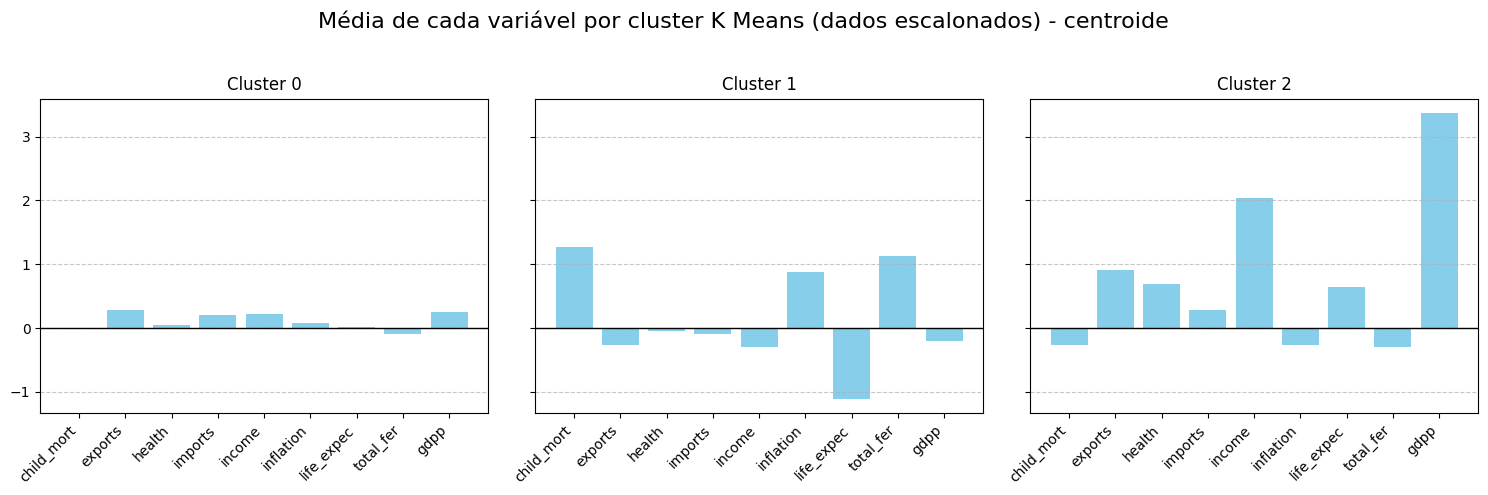

In [120]:
n_clusters = df_scaled['cluster_kmeans'].nunique()
fig, axes = plt.subplots(1, n_clusters, figsize=(15, 5), sharey=True)

for i, cluster in enumerate(sorted(df_scaled['cluster_kmeans'].unique())):
    axes[i].bar(cluster_means_scaled.columns, cluster_means_scaled.loc[cluster], color='skyblue')
    axes[i].set_title(f"Cluster {cluster}")
    axes[i].set_xticklabels(cluster_means_scaled.columns, rotation=45, ha='right')
    axes[i].axhline(0, color='black', linewidth=1)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle("Média de cada variável por cluster K Means (dados escalonados) - centroide", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Ao final de todas essas análises, é possível resumir portanto as características mais marcantes de cada cluster:

- Cluster 0: maior grupo do dataset, abrigando 86 países. Caracterizado por métricas em geral intermediárias dos dados, como baixa/intermediária mortalidade infantil, intermediária expectativa de vida, PIB per capita baixo/intermediário, inflação intermediária. Pode-se considerar que abriga em geral países em desenvolvimento que estejam com seus índices na média, entre o cluster 1 e o cluster 2.
- Cluster 1: abriga 52 países. Caracterizado por métricas em geral negativas, como: alta mortalidade infantil, baixa expectativa de vida, alto número de filhos por mulher fértil (total_fer), alta inflação, pouca exportação e baixo PIB per capita. Pode-se considerar que tratam-se, em sua maioria, de países subdesenvolvidos muito pobres.
- Cluster 2: abriga 29 países. Caracterizado em geral por métricas positivas, como: baixa mortalidade infantil, alto número de exportações, alto índice de saúde, alta renda, muito alto PIB per capita, alta expectativa de vida. Em geral, tratam-se de países desenvolvidos.

Vamos verificar agora qual país é o mais representativo de cada cluster. Para isso, vamos utilizar duas estratégias diferentes e depois eleger qual a melhor:
- a **primeira estratégia** será procurar encontrar o país mais próximo do centroide de cada cluster. Isso será feito calculando a distância euclidiana de cada país em relação ao centroide do seu cluster e encontrar aquele que minimiza o valor dessa distância.
- a **segunda estratégia** será pelo cálculo da medoide, ou seja, do ponto do cluster com menor soma da distância em relação aos outros pontos.

##### Cálculo dos países cujo ponto é o mais próximo do centroide

In [122]:
import numpy as np
import pandas as pd

representative_countries_1 = []

for cluster in sorted(df_scaled['cluster_kmeans'].unique()):
    # Dados de cada cluster
    cluster_data = df_scaled[df_scaled['cluster_kmeans'] == cluster]
    
    # Média do cluster - centroide
    cluster_mean = cluster_means_scaled.loc[cluster, training_cols]
    
    # distância euclidiana de cada país à média do cluster usando apenas as colunas de treinamento definidas anteriormente
    distances = np.linalg.norm(cluster_data[training_cols] - cluster_mean, axis=1)
    distances = pd.Series(distances, index=cluster_data.index) 
    
    # País com menor distância ao centroide de cada cluster
    closest_country = cluster_data.loc[distances.idxmin(), 'country']
    representative_countries_1.append((cluster, closest_country))

print("========Países cujo ponto é o mais próximo do centroide ========")
for cluster, country in representative_countries_1:
    print(f"Cluster {cluster}: {country}")


========Países cujo ponto é o mais próximo do centroide ========
Cluster 0: Suriname
Cluster 1: Ghana
Cluster 2: Austria


/tmp/ipykernel_9283/927156488.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(training_cols, rotation=45, ha='right')
/tmp/ipykernel_9283/927156488.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(training_cols, rotation=45, ha='right')
/tmp/ipykernel_9283/927156488.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(training_cols, rotation=45, ha='right')


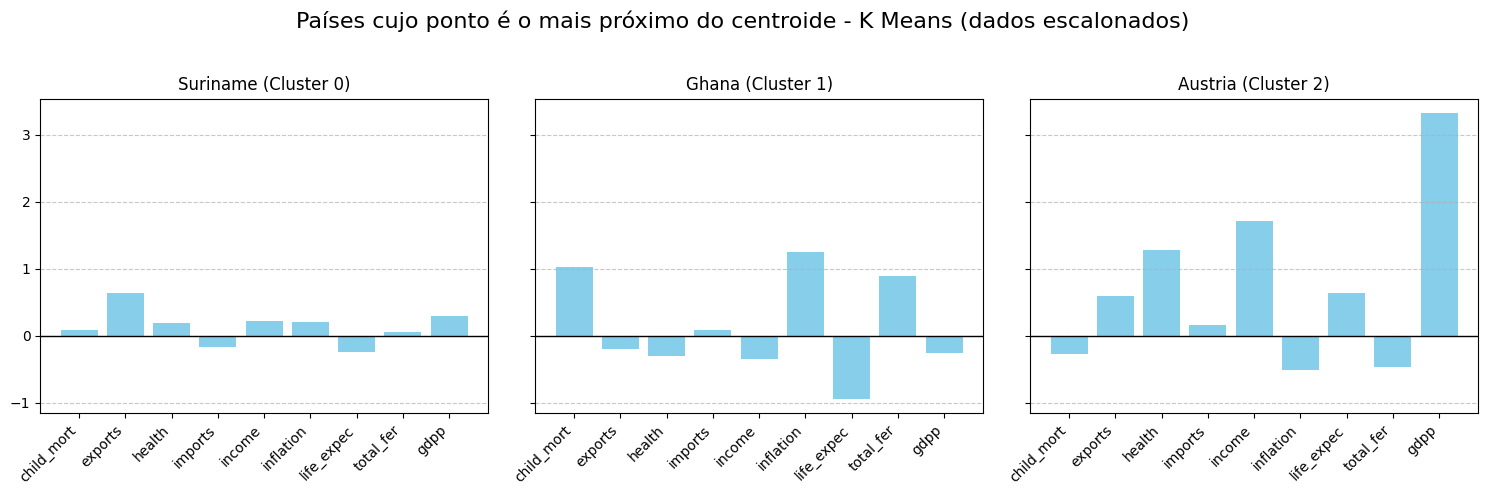

In [124]:

n_clusters = df_scaled['cluster_kmeans'].nunique()
fig, axes = plt.subplots(1, n_clusters, figsize=(15, 5), sharey=True)

for i, cluster in enumerate(sorted(df_scaled['cluster_kmeans'].unique())):
    
    country_name = [c for cl, c in representative_countries_1 if cl == cluster][0]
    country_data = df_scaled[df_scaled['cluster_kmeans'] == cluster]
    country_data = country_data[country_data['country'] == country_name]
    
    values = country_data[training_cols].iloc[0]

    axes[i].bar(training_cols, values, color='skyblue')
    axes[i].set_title(f"{country_name} (Cluster {cluster})")
    axes[i].set_xticklabels(training_cols, rotation=45, ha='right')
    axes[i].axhline(0, color='black', linewidth=1)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle("Países cujo ponto é o mais próximo do centroide - K Means (dados escalonados)", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




Os gráficos acima demontram ser muito semelhantes aos que foram plotados anteriormente com as médias de cada cluster, comprovando portanto que tais países são bons candidatos a representantes de seus respectivos clusters.

##### Cálculo dos países representativos encontrando ponto medoide

Agora vamos encontrar o país representativo de cada cluster utilizando o cálculo do ponto medoide (segunda estratégia), ou seja, o país cujo ponto minimiza a soma das distâncias entre ele e os demais pontos do cluster:

In [116]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

representative_countries_2 = []

for cluster in sorted(df_scaled['cluster_kmeans'].unique()):
    # Dados de cada cluster
    cluster_data = df_scaled[df_scaled['cluster_kmeans'] == cluster]
    cluster_points = cluster_data[training_cols].values
    
    # matriz de distâncias entre os pontos no cluster
    dist_matrix = cdist(cluster_points, cluster_points, metric='euclidean')
    
    # soma das distâncias de cada ponto em relação aos outros
    sum_distances = dist_matrix.sum(axis=1)
    
    # encontrando o medoide (menor soma de distâncias)
    medoid_index = np.argmin(sum_distances)
    medoid_country = cluster_data.iloc[medoid_index]['country']
    
    representative_countries_2.append((cluster, medoid_country))

print("========Países representativos de cada cluster K Means - usando medoide ========")
for cluster, country in representative_countries_2:
    print(f"Cluster {cluster}: {country}")


========Países representativos de cada cluster K Means - usando medoide ========
Cluster 0: Tunisia
Cluster 1: Tanzania
Cluster 2: Finland


/tmp/ipykernel_9283/3215900492.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(training_cols, rotation=45, ha='right')
/tmp/ipykernel_9283/3215900492.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(training_cols, rotation=45, ha='right')
/tmp/ipykernel_9283/3215900492.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(training_cols, rotation=45, ha='right')


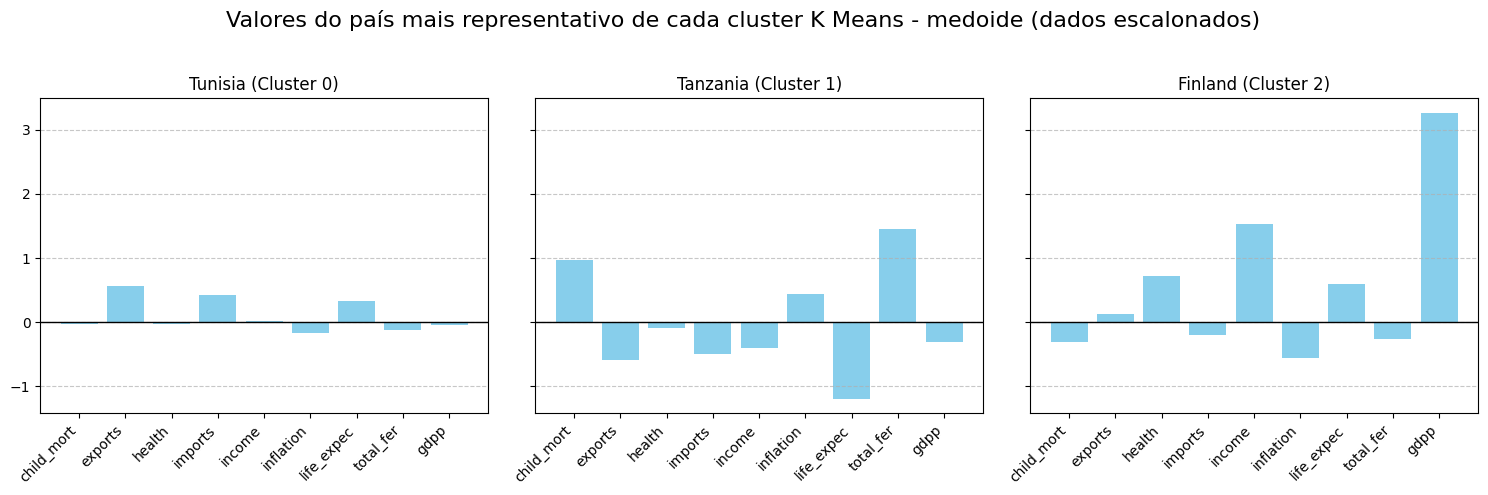

In [125]:

n_clusters = df_scaled['cluster_kmeans'].nunique()
fig, axes = plt.subplots(1, n_clusters, figsize=(15, 5), sharey=True)

for i, cluster in enumerate(sorted(df_scaled['cluster_kmeans'].unique())):
    
    country_name = [c for cl, c in representative_countries_2 if cl == cluster][0]
    country_data = df_scaled[df_scaled['cluster_kmeans'] == cluster]
    country_data = country_data[country_data['country'] == country_name]
    
    values = country_data[training_cols].iloc[0]

    axes[i].bar(training_cols, values, color='skyblue')
    axes[i].set_title(f"{country_name} (Cluster {cluster})")
    axes[i].set_xticklabels(training_cols, rotation=45, ha='right')
    axes[i].axhline(0, color='black', linewidth=1)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle("Valores do país mais representativo de cada cluster K Means - medoide (dados escalonados)", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Podemos observar que o cálculo do medoide também demonstrou resultados compatíveis com o centroide calculado. E será ela a estratégia (cálculo dos medoides) escolhida como a principal a fim de determinar os **países mais representativos de cada cluster, que portanto serão Tunísia (cluster 0), Tanzânia (cluster 1) e Finlândia (cluster 2)**. Isso por alguns motivos:
- O cálculo do medoide captura uma noção mais global e **real** de centralidade no cluster, levando em conta todos os pontos ao redor, e não um centroide abstrato.
- além disso, o cálculo do **medoide é mais robusto a eventuais outliers**, diferente do centroide. Enquanto o cálculo do centroide pode ser afetado por valores extremos (pois valores extremos podem acabar distorcendo a média, e portanto o centroide), o medoide por sua vez considera a estrutura coletiva do cluster, vai procurar o ponto que mais se aproxime de **todos**.


#### 3.3